In [123]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [149]:
def largest_rotated_rect(w, h, angle):
    """
    Given a rectangle of size wxh that has been rotated by 'angle' (in
    radians), computes the width and height of the largest possible
    axis-aligned rectangle within the rotated rectangle.
    Original JS code by 'Andri' and Magnus Hoff from Stack Overflow
    Converted to Python by Aaron Snoswell
    Source: http://stackoverflow.com/questions/16702966/rotate-image-and-crop-out-black-borders
    """

    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (
        math.ceil(bb_w - 2 * x),
        math.ceil(bb_h - 2 * y)
    )

def rotate(image, angle, crop=True):
    img = image.convert('RGBA').rotate(15, expand=True)
    if crop: # use largest useful space
        largest = largest_rotated_rect(image.size[0], image.size[1], angle)
        left = (rot.size[0]/2) - (largest[0]/2)
        upper = (rot.size[1]/2) - (largest[1]/2)
        right = left + largest[0]
        lower = upper + largest[1]
        img = img.crop((left, upper, right, lower))
    else: # white background
        fff = Image.new('RGBA', img.size, (255,)*4)
        img = Image.composite(img, fff, img).convert('RGB')
    return img

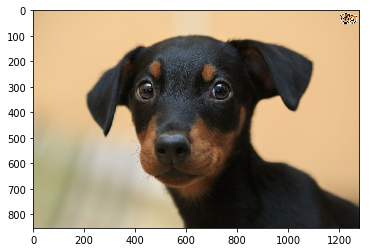

In [150]:
img = Image.open('dog.jpg')
plt.imshow(img)

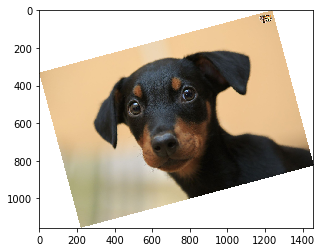

In [151]:
rot = rotate(img, 45, crop=False)
plt.imshow(rot)

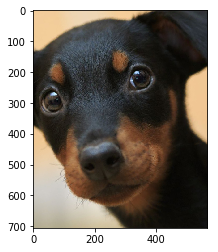

In [152]:
img = Image.open('dog.jpg')
rot = rotate(img, 45)
plt.imshow(rot)